# Loading Test image


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = cv2.imread('1Z2J2ECZ7K49_jpg.rf.d2fc14830de2627001b057645785cab8.jpg')

convert image

Image shape: (480, 480)
Image dtype: uint8


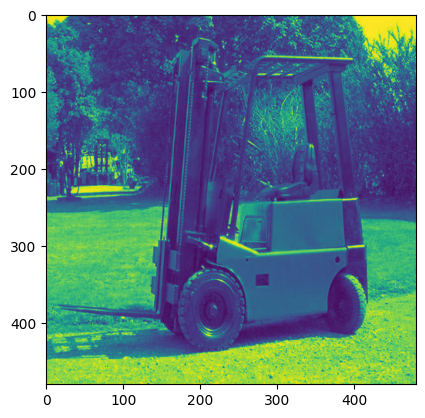

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the original image to gray scale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Specify the parameters for our HOG descriptor
img_s=cv2.resize(img_gray, (48, 48), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_s)
print("Image shape:", img_s.shape)
print("Image dtype:", img_s.dtype)


In [26]:
win_size = img_s.shape
print(win_size)
cell_size = (8, 8)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 18

# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)
hog_descriptor = hog.compute(img_s)
print(len(hog_descriptor))

(480, 480)
250632
